## Estimate the Model

In [3]:
from splinetlsm.svi import SplineDynamicLSM
from splinetlsm.datasets import load_polecat

Y, time_points, X, node_names, iso_codes, regions, time_labels = load_polecat()

model = SplineDynamicLSM(n_features=6)
model.fit(Y, time_points, X=X)

print("Model AUC: {:.3f}".format(model.auc_))

## Coefficient Functions (Figure 3)

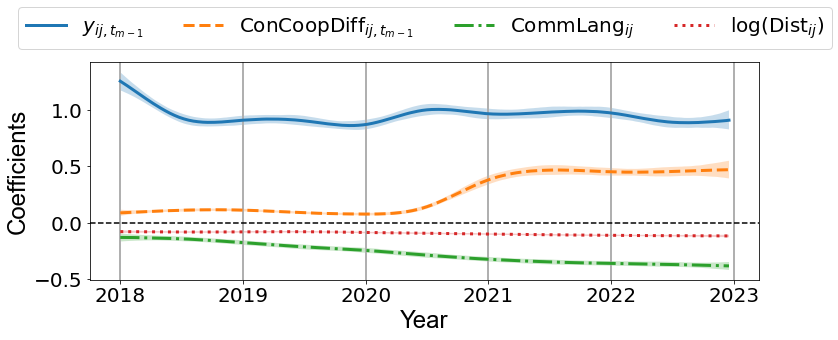

In [8]:
coefs = model.samples_['W_coefs'] @ model.B_fit_.todense()
coefs = coefs.transpose((0, 2, 1))
ci = np.quantile(coefs, q=[0.025, 0.5, 0.975], axis=0)

fig, ax = plt.subplots(figsize=(12,4))
labels = [ 
    r"$y_{ij,t_{m-1}}$",
    r"ConCoopDiff$_{ij,t_{m-1}}$",
    r'CommLang$_{ij}$',
    r'$\log($Dist$_{ij})$']

ls = ['-', '--', '-.', ':']
for k in range(X.shape[-1]):
    ax.plot(time_points, ci[1, :, k], linestyle=ls[k], lw=3, label=labels[k])
    ax.fill_between(time_points, ci[0, :, k], ci[2, :, k], alpha=0.25)

ax.axhline(0, linestyle='--', color='k')

ax.set_xticks([i * 52 for i in range(6)])
ax.set_xticklabels([2018 + i for i in range(6)], fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.grid(axis='x', lw=2)
ax.set_xlabel('Year', fontsize=24, fontfamily='Arial')
ax.set_ylabel('Coefficients', fontsize=24, fontfamily='arial')
ax.legend(loc='upper center', ncols=4, fontsize=20, bbox_to_anchor=(0.5, 1.3))

## Nodewise Variances (Figure 4)

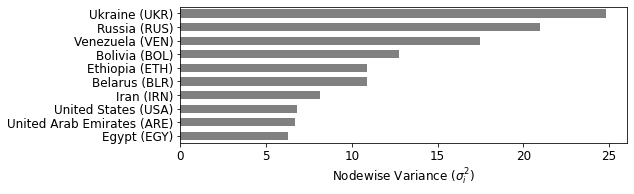

In [9]:
fig, ax =  plt.subplots(figsize=(8, 2.5))
order = np.argsort(model.w_prec_)[:10]
str_order = [' (' + iso_codes[o] + ')' for o in order]
sns.barplot(x=(1/model.w_prec_[order]) ** 2, 
    y=node_names[order] + str_order, 
    color='gray', width=0.6,
    orient='h', ax=ax)
ax.set_xlabel('Nodewise Variance ($\sigma_i^2$)', fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=12)

## Ukraine's Degree Time Series (Figure 15)

Text(0.5, 1.0, 'Ukraine')

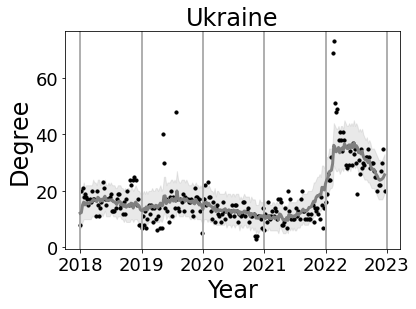

In [12]:
import jax
import jax.numpy as jnp
import functools

from splinetlsm.static_gof import vec_to_adjacency

def node_degree(y_vec, node_id=0):
    n_time_steps = y_vec.shape[0]
    
    def stat_fun(carry, t):
        Y = vec_to_adjacency(y_vec[t])
        return None, Y[node_id].sum()
    _, res = jax.lax.scan(stat_fun, None, jnp.arange(n_time_steps))
    
    return res.astype(int)

ts = time_points

node_id = 174
degree_func = functools.partial(node_degree, node_id=node_id)
res = model.posterior_predictive(degree_func, chunk_size=250)
se = np.quantile(res, q=[0.025, 0.975], axis=0)
y = dynamic_adjacency_to_vec(Y)
d_obs = degree_func(y)

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(ts, res.mean(axis=0), lw=3, label='Posterior Mean', c='gray')
ax.fill_between(ts, se[0], se[1], alpha=0.25, label='95% Credible Interval', 
                color='darkgray')
ax.scatter(time_points, d_obs, color='k', s=10, label='Observed Statistic')

ax.set_xticks([i * 52 for i in range(6)])
ax.set_xticklabels([2018 + i for i in range(6)], fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.grid(axis='x', lw=2)
ax.set_xlabel('Year', fontsize=24)
ax.set_ylabel(f"Degree", fontsize=24)
ax.set_title(node_names[node_id], fontsize=24)

## Venezuela's Degree Time Series (Figure 15)

Text(0.5, 1.0, 'Venezuela')

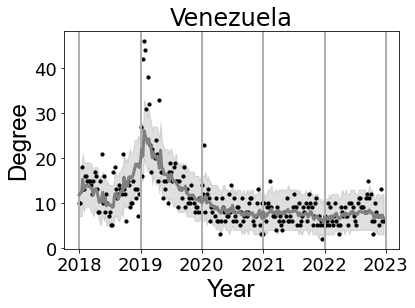

In [13]:
node_id = 181
degree_func = functools.partial(node_degree, node_id=node_id)
res = model.posterior_predictive(degree_func, chunk_size=250)
se = np.quantile(res, q=[0.025, 0.975], axis=0)
y = dynamic_adjacency_to_vec(Y)
d_obs = degree_func(y)

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(ts, res.mean(axis=0), lw=3, label='Posterior Mean', c='gray')
ax.fill_between(ts, se[0], se[1], alpha=0.25, label='95% Credible Interval', color='gray')
ax.scatter(time_points, d_obs, color='k', s=10, label='Observed Statistic')

ax.set_xticks([i * 52 for i in range(6)])
ax.set_xticklabels([2018 + i for i in range(6)], fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.grid(axis='x', lw=2)
ax.set_xlabel('Year', fontsize=24, fontfamily='Arial')
ax.set_ylabel(f"Degree", fontsize=24, 
              fontfamily='arial')
ax.set_title(node_names[node_id], fontsize=24)

## Ethiopia Degree Time Series (Figure 15)

Text(0.5, 1.0, 'Ethiopia')

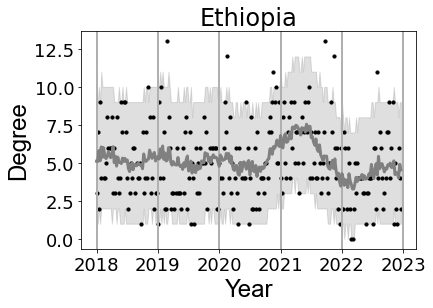

In [14]:
node_id = 55
degree_func = functools.partial(node_degree, node_id=node_id)
res = model.posterior_predictive(degree_func, chunk_size=250)
se = np.quantile(res, q=[0.025, 0.975], axis=0)
y = dynamic_adjacency_to_vec(Y)
d_obs = degree_func(y)

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(ts, res.mean(axis=0), lw=3, label='Posterior Mean', c='gray')
ax.fill_between(ts, se[0], se[1], alpha=0.25, label='95% Credible Interval', color='gray')
ax.scatter(time_points, d_obs, color='k', s=10, label='Observed Statistic')

ax.set_xticks([i * 52 for i in range(6)])
ax.set_xticklabels([2018 + i for i in range(6)], fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.grid(axis='x', lw=2)
ax.set_xlabel('Year', fontsize=24, fontfamily='Arial')
ax.set_ylabel(f"Degree", fontsize=24, fontfamily='arial')
ax.set_title(node_names[node_id], fontsize=24)

## Latent Space (Figure 6)

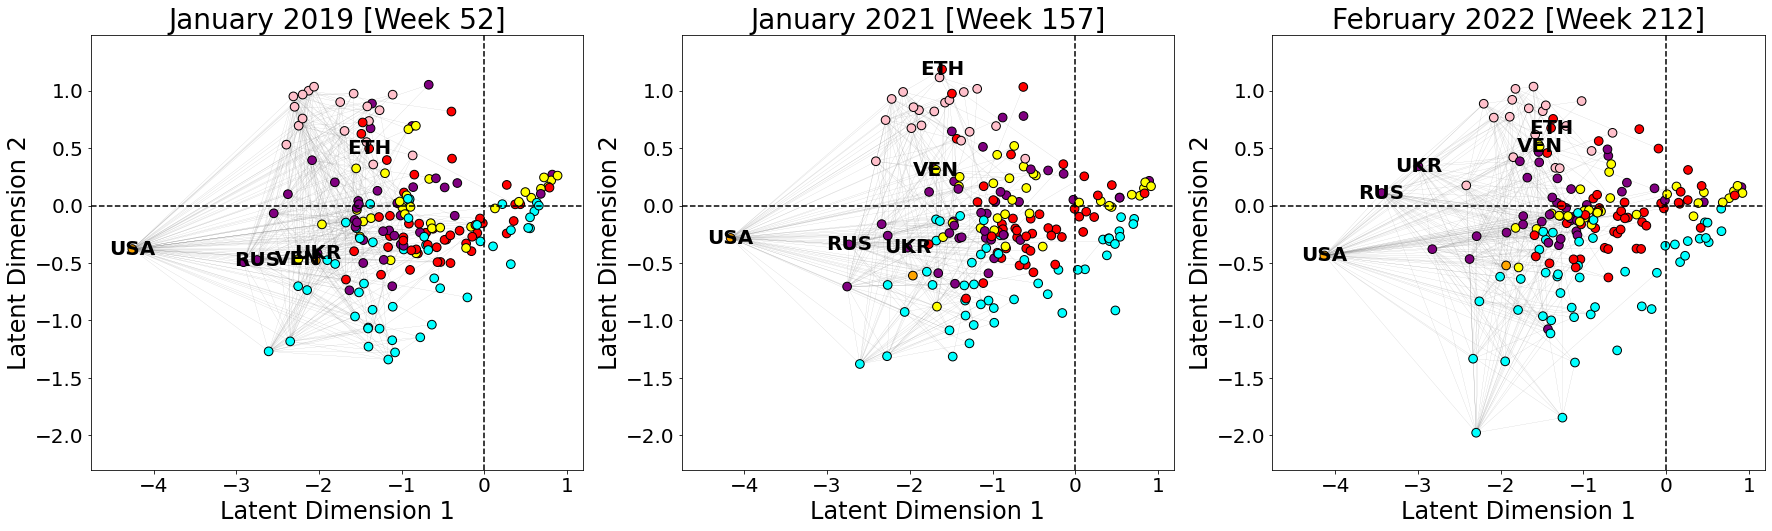

In [15]:
import networkx as nx

from dateutil.parser import parse
from sklearn.preprocessing import OrdinalEncoder

fig, ax = plt.subplots(figsize=(30, 8), ncols=3, sharex=True, sharey=True)

encoder = OrdinalEncoder().fit(np.asarray(regions).reshape(-1, 1))
reg = encoder.transform(np.asarray(regions).reshape(-1, 1)).ravel()
colors = ["red", "cyan", "purple", "yellow","pink", 'orange']
hl_nodes = [[181], [155], [174, 136]]

for i, t in enumerate([52, 157, 212]):
    n_nodes = Y[t].shape[0]
    names = iso_codes.ravel()
    g = nx.from_numpy_array(Y[t])
    g = nx.relabel_nodes(g, {k : names[k] for k in range(Y[t].shape[0])})
    U = model.U_[t]


    u = np.c_[U[:, 0], U[:, 1]]
    ids_text = [181, 136, 174, 55, 177]
    ids_text_hl = [174, 136, 181, 55, 177, 35, 162]

    labels = {names[k] : names[k] if k in ids_text else '' for k in range(Y[t].shape[0])}
    pos = {names[k] : u[k] for k in range(Y[t].shape[0])}
    nx.draw_networkx(g, pos, 
                 node_size=75,
                 node_color=[colors[i] for i in reg.astype(int)],
                 edge_color='gray', width=0.1,
                 labels=labels, with_labels=True, font_size=20, font_weight='bold',
                  edgecolors='k', ax=ax[i])
    ax[i].tick_params(left=True, bottom=True, labelleft=True, labelbottom=True,
                      labelsize=20)
    ax[i].axhline(0, color='k', linestyle='--')
    ax[i].axvline(0, color='k', linestyle='--')
    ax[i].set_xlabel(r'Latent Dimension 1', fontsize=24)
    ax[i].set_ylabel(r'Latent Dimension 2', fontsize=24)
    
    week = time_labels[t].split('-')[-1]
    ax[i].set_title(parse(time_labels[t]).strftime('%B %Y') + f" [Week {t}]", fontsize=28)

## Shrinkage Parameters (Figure 8)

Text(0, 0.5, 'Shrinkage Parameter ($\\gamma_h^{-1}$)')

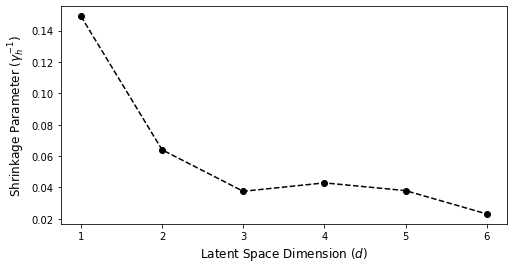

In [16]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(np.arange(1, 7), 1/model.gamma_, 'ko--')
ax.set_xlabel('Latent Space Dimension ($d$)', fontsize=12)
ax.set_ylabel('Shrinkage Parameter ($\gamma_h^{-1}$)', fontsize=12)